# 1. Load Data
------

In [1]:
!pip install kagglehub[pandas-datasets]
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [2]:
import kagglehub
import os
# Store the path of the Kaggle dataset
path = kagglehub.dataset_download("jonassouza872/vitoria-da-conquista-weather-data-september")
# Check if the path is correct
print(path)

# List all files inside the downloaded folder
print(os.listdir(path))

Using Colab cache for faster access to the 'vitoria-da-conquista-weather-data-september' dataset.
/kaggle/input/vitoria-da-conquista-weather-data-september
['temp.csv']


In [3]:
import pandas as pd
df = pd.read_csv(f"{path}/temp.csv")  # Reads the declared path as a CSV file
df.head()  # Prints the first 5 rows of the dataset

,Timestamp,Temp_MPU6050_C,Temp_AHT20_C,Umid_AHT20_pct,Temp_BMP280_C,Press_BMP280_hPa,Temp_BMP180_C,Press_BMP180_hPa,Temp_DS18B20_C,Temp_NTC_C,Temp_DHT11_C,Umid_DHT11_pct
0,2025-08-31 22:31:02,20.86,19.90,73.37,21.28,921.24,20.19,923.02,25.69,22.26,20.03,66.0
1,2025-08-31 22:31:33,21.75,19.97,75.57,21.48,921.12,20.27,923.04,23.81,20.73,20.02,66.0
2,2025-08-31 22:32:05,21.80,19.75,74.31,21.25,921.20,20.16,923.06,22.50,20.88,20.02,67.0
3,2025-08-31 22:32:36,21.57,19.55,74.77,21.07,921.15,20.06,922.99,21.31,20.62,20.01,66.0
4,2025-08-31 22:33:07,21.66,19.60,75.09,21.12,921.25,20.06,923.02,21.88,20.95,20.00,66.0


In [4]:
df.columns #all columns

Index(['Timestamp', 'Temp_MPU6050_C', 'Temp_AHT20_C', 'Umid_AHT20_pct',
       'Temp_BMP280_C', 'Press_BMP280_hPa', 'Temp_BMP180_C',
       'Press_BMP180_hPa', 'Temp_DS18B20_C', 'Temp_NTC_C', 'Temp_DHT11_C',
       'Umid_DHT11_pct'],
      dtype='object')

In [5]:
df_validation = pd.read_csv("/content/validation_and_Measured_Data_cleaned_BRT_.csv")  # Reads the declared path as a CSV file
df_validation.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/validation_and_Measured_Data_cleaned_BRT_.csv'

# 2. Machine Learning and Prediction

----------

## 2.1 Decision Tree
---

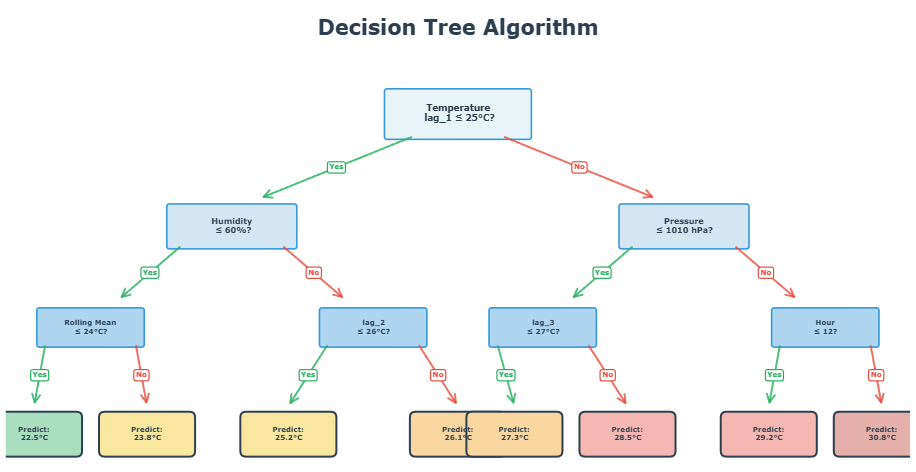

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Prepare features - average of all sensors
df['humidity_avg'] = df[['Umid_AHT20_pct', 'Umid_DHT11_pct']].mean(axis=1)
df['pressure_avg'] = df[['Press_BMP280_hPa', 'Press_BMP180_hPa']].mean(axis=1)
df['temp_avg'] = df[['Temp_MPU6050_C', 'Temp_AHT20_C', 'Temp_BMP280_C',
                      'Temp_BMP180_C', 'Temp_DS18B20_C', 'Temp_NTC_C',
                      'Temp_DHT11_C']].mean(axis=1)

# Prepare data
X = df[['humidity_avg', 'pressure_avg']].dropna()
y = df.loc[X.index, 'temp_avg']

# Split 80/20
split = int(len(X) * 0.8)
X_train, X_val = X.iloc[:split], X.iloc[split:]
y_train, y_val = y.iloc[:split], y.iloc[split:]

# Train
model = DecisionTreeRegressor(max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_val)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(y_val.index, y_val.values, label='Real', linewidth=2, color='blue')
plt.plot(y_val.index, y_pred, label='Predicted', linewidth=2, color='red', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Decision Tree - Temperature Prediction (All Sensors Average)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 12))
plot_tree(
    model,
    feature_names=['humidity_avg', 'pressure_avg'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Structure")
plt.show()